# WeatherPy

This WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and weather.
* In plotting latitude vs temperature, the temperatures increased as the cities neared zero latitude, that is the equator. 
* The latitude vs humidity scatter plot has a concentration of cities with humidity above 60% at latitudes between -5 and 15. 
* Looking at latitude vs wind speed, there is a higher concentration of wind speeds up to 10 mph in cities between 30 and 70 degrees latitude.
* Temperatures in the Norhtern hemisphere show a moderate positive correlation to latitude while the Southern hemisphere shows a strong positive correlation. In both hemispheres, there is almost no latitude correlation to weather patterns in humidity, cloudiness, and wind speed. Based on this analysis, temperature is primarily effected by latitude.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Get today's date to add to plot titles
date = dt.datetime.now()
date = date.strftime("%m/%d/%Y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls

In [50]:
# Base URL from the OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create the query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

#Create lists to store the data
city_name= []
country = []
date_time = []
lat = []
lon = []
temp = []
humid = []
clouds = []
wind = []

#Running a query to get the weather data for each city in the cites list
print("Beginning Data Retrieval\n----------------------")
#Got a tip from stack Overflow on using the emumerate function for showing the index
for index, city in enumerate(cities, start=1):
    try:
        query = query_url + city  
        city_data = requests.get(query).json()

        #Print out each city and its ID as it is being processed
        print(f"Processing result {index}...City Name: {city}")    
        #Each element of data is being appended to a coorsponding list as it is processed
        city_name.append(city_data['name'])
        country.append(city_data['sys']['country'])
        date_time.append(city_data['dt'])
        lat.append(city_data['coord']['lat'])
        lon.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp_max'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])  
    # If the city is not found in OpenWeatherMap, skip it
    except:
        print("City not found. Skipping...")
        pass
print("----------------------\nData Retrieval Complete\n----------------------")

Beginning Data Retrieval
----------------------
Processing result 1...City Name: gushikawa
Processing result 2...City Name: opuwo
Processing result 3...City Name: hermanus
Processing result 4...City Name: wattegama
Processing result 5...City Name: hithadhoo
Processing result 6...City Name: hofn
Processing result 7...City Name: saleaula
City not found. Skipping...
Processing result 8...City Name: glenwood springs
Processing result 9...City Name: illoqqortoormiut
City not found. Skipping...
Processing result 10...City Name: sorvag
City not found. Skipping...
Processing result 11...City Name: bridlington
Processing result 12...City Name: yerbogachen
Processing result 13...City Name: busselton
Processing result 14...City Name: yeletskiy
City not found. Skipping...
Processing result 15...City Name: dhidhdhoo
Processing result 16...City Name: longyearbyen
Processing result 17...City Name: onverwacht
Processing result 18...City Name: mahebourg
Processing result 19...City Name: vidim
Processin

Processing result 174...City Name: aksarka
Processing result 175...City Name: richards bay
Processing result 176...City Name: abbeville
Processing result 177...City Name: banmo
City not found. Skipping...
Processing result 178...City Name: ilulissat
Processing result 179...City Name: bengkulu
Processing result 180...City Name: airai
Processing result 181...City Name: namibe
Processing result 182...City Name: poceirao
Processing result 183...City Name: giyani
Processing result 184...City Name: kaitangata
Processing result 185...City Name: yanan
City not found. Skipping...
Processing result 186...City Name: borinskoye
Processing result 187...City Name: nome
Processing result 188...City Name: visnes
Processing result 189...City Name: dikson
Processing result 190...City Name: nantucket
Processing result 191...City Name: asosa
Processing result 192...City Name: souillac
Processing result 193...City Name: sabang
Processing result 194...City Name: boyolangu
Processing result 195...City Name: 

Processing result 350...City Name: nguiu
City not found. Skipping...
Processing result 351...City Name: mbanza-ngungu
Processing result 352...City Name: maumere
Processing result 353...City Name: katangli
Processing result 354...City Name: jenison
Processing result 355...City Name: lebu
Processing result 356...City Name: belushya guba
City not found. Skipping...
Processing result 357...City Name: darhan
Processing result 358...City Name: ponta do sol
Processing result 359...City Name: thinadhoo
Processing result 360...City Name: tual
Processing result 361...City Name: burica
City not found. Skipping...
Processing result 362...City Name: kaeo
Processing result 363...City Name: henties bay
Processing result 364...City Name: kontagora
Processing result 365...City Name: port hardy
Processing result 366...City Name: sioux lookout
Processing result 367...City Name: dibrugarh
Processing result 368...City Name: tamiahua
Processing result 369...City Name: lolua
City not found. Skipping...
Proce

Processing result 531...City Name: juxtlahuaca
Processing result 532...City Name: zhigansk
Processing result 533...City Name: hegang
Processing result 534...City Name: sobolevo
Processing result 535...City Name: port shepstone
Processing result 536...City Name: adeje
Processing result 537...City Name: yantzaza
Processing result 538...City Name: chizhou
Processing result 539...City Name: jasmine estates
Processing result 540...City Name: vicuna
Processing result 541...City Name: mayumba
Processing result 542...City Name: ust-kamchatsk
City not found. Skipping...
Processing result 543...City Name: kautokeino
Processing result 544...City Name: saint-augustin
Processing result 545...City Name: lavrentiya
Processing result 546...City Name: ahipara
Processing result 547...City Name: agen
Processing result 548...City Name: toropets
Processing result 549...City Name: oranjestad
Processing result 550...City Name: mutsamudu
City not found. Skipping...
Processing result 551...City Name: rio brilh

### Convert Raw Data to DataFrame

In [55]:
#Creating a dictionary of the weather stats for each city
weather_dict = {"City": city_name,
                "Country": country,
                "Latitude": lat,
                "Longitude": lon,
                "Max Temp(F)": temp,
                "Humidity(%)": humid,
                "Cloudiness(%)": clouds,
                "Wind Speed(mph)": wind,
                "City Date/Time": date_time}

#Making a dataframe table of the dictionary data
weather_data = pd.DataFrame(weather_dict) 

#Exporting the data to a csv file without the Pandas index, but with the header
weather_data.to_csv("out_put/cities.csv", encoding="utf-8", index=False, header=True)
weather_data.head()

,City,Country,Latitude,Longitude,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(mph),City Date/Time
0,Gushikawa,JP,26.35,127.87,87.80,74,20,13.87,1596413633
1,Opuwo,NA,-18.06,13.84,58.37,34,0,7.83,1596413371
2,Hermanus,ZA,-34.42,19.23,48.99,97,0,1.01,1596413633
3,Wattegama,LK,6.80,81.48,78.75,68,100,11.50,1596413633
4,Hithadhoo,MV,-0.60,73.08,83.10,75,51,10.18,1596413342


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [56]:
#Checking the weather dataframe to make sure no cities are over 100 percent humidity.
too_humid = weather_data["Humidity(%)"] > 100
for value in too_humid:
    if value == "True":
        print("A city has over 100% humidity.")
print("All cities checked for humidity range compliance.")

All cities checked for humidity range compliance.


## Latitude vs. Temperature Plot

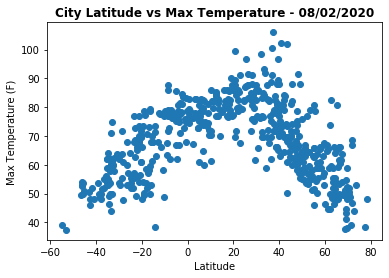

In [57]:
# Plot the latitude of the city compared to its temperature
city_lat = weather_data['Latitude']
temp = weather_data['Max Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature - {date}', fontweight="black")
#Saving the scatter plot as a png file
plt.savefig("lat_temp.png")
plt.show()

### City Latitude vs Temperature
The WeatherPy code collects API data from a random selection of 500 or more cities around the globe. The data from those cities is plotted to determine correlations between latitude and weather. In plotting latitude vs temperature, the temperatures increased as the cities neared zero latitude, that is the equator. 


## Latitude vs. Humidity Plot

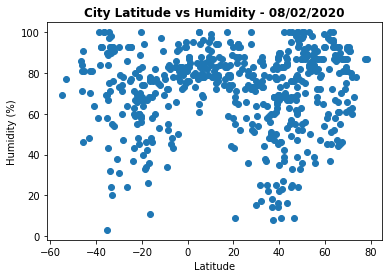

In [58]:
# Plot the latitude of the city compared to its humidity
city_lat = weather_data['Latitude']
humidity = weather_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity - {date}', fontweight="black")
#Saving the scatter plot as a png file
plt.savefig("lat_humid.png")
plt.show()

### City Latitude vs Humidity
The WeatherPy code collects API data from a random selection of 500 or more cities around the globe. The data from those cities is plotted to determine correlations between latitude and weather. In plotting latitude vs humidity, there is a concentration of cities with humidity above 60% at latitudes between -5 and 15. 


## Latitude vs. Cloudiness Plot

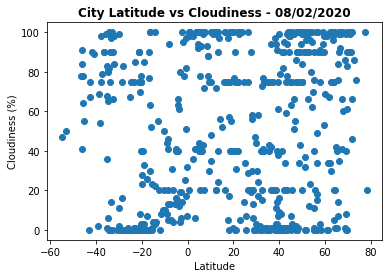

In [59]:
# Plot the latitude of the city compared to its cloudiness
city_lat = weather_data['Latitude']
clouds = weather_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness - {date}', fontweight="black")
#Saving the scatter plot as a png file
plt.savefig("lat_clouds.png")
plt.show()

### City Latitude vs Cloudiness
The WeatherPy code collects API data from a random selection of 500 or more cities around the globe. The data from those cities is plotted to determine correlations between latitude and weather. Regardless of the latitude, the density of clouds tends to be either above 75% or 20% and below.

## Latitude vs. Wind Speed Plot

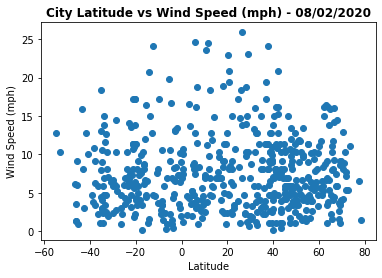

In [60]:
# Plot the latitude of the city compared to its wind speed
city_lat = weather_data['Latitude']
wind = weather_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed (mph) - {date}', fontweight="black")
#Saving the scatter plot as a png file
plt.savefig("lat_wind.png")
plt.show()

### City Latitude vs Wind Speed
The WeatherPy code collects API data from a random selection of 500 or more cities around the globe. The data from those cities is plotted to determine correlations between latitude and weather. In plotting latitude vs wind speed, there is a slightly higher concentration of wind speeds up to 10 mph in cities between 30 and 70 degrees latitude.

## Linear Regression

In [61]:
# If the city latitude is greater than zero it is in the northern hemisphere
northern_data = weather_data.loc[weather_data['Latitude'] > 0]
# If the city latitude is less than zero it is in the southern hemisphere
southern_data = weather_data.loc[weather_data['Latitude'] < 0]

In [62]:
#This function creates and plots a liner regression line and equation, and returns the r-squared value
def linear_regression(city_lat, weather):
    x_values = city_lat
    y_values = weather
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.min()), fontsize=12 ,color="red")
    return print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4464783329458582


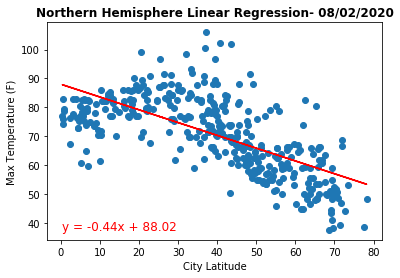

In [63]:
# Plot the latitude of the city compared to its temperature
city_lat = northern_data['Latitude']
temp = northern_data['Max Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, temp)
#Saving the scatter plot as a png file
plt.savefig("northern_regress_temp.png")
plt.show()

This linear regression model for the Northern hemisphere is showing if there is any correlation between temperature and latitude. Based on the r-squared value (correlation coeficient), there is a moderate correlation between latitude and temperature. That is, temperature rises the closer we get to zero, or the equator.

####  Southern Hemisphere -  Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5221071676119055


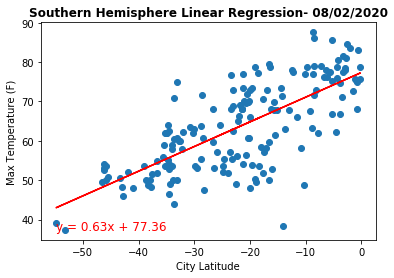

In [64]:
# Plot the latitude of the city compared to its temperature
city_lat = southern_data['Latitude']
temp = southern_data['Max Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, temp)
#Saving the scatter plot as a png file
plt.savefig("southern_regress_temp.png")
plt.show()

This linear regression model for the Southern hemisphere is showing if there is any correlation between temperature and latitude. Based on the r-squared value (correlation coeficient), there is a strong correlation between latitude and temperature. That is, temperature rises the closer we get to zero, or the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005059615401700165


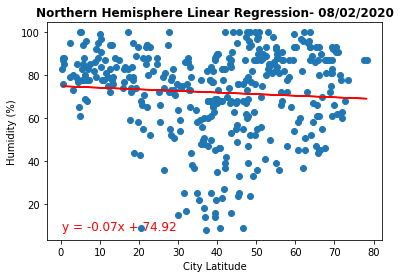

In [65]:
# Plot the latitude of the city compared to its humidity
city_lat = northern_data['Latitude']
humidity = northern_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, humidity)
#Saving the scatter plot as a png file
plt.savefig("northern_regress_humid.png")
plt.show()

This linear regression model for the Northern hemisphere is showing if there is any correlation between humidity and latitude. Based on the r-squared value (correlation coeficient), there is a almost no correlation between latitude and humidity. Comparing the correlation between latitude and temperature vs latitude and humidity, increase in temperature does not effect relative humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.7588613376845788e-07


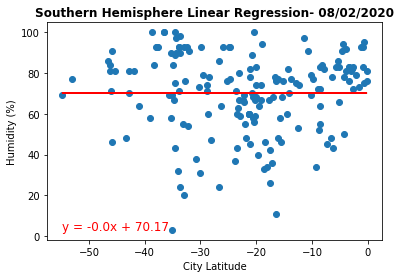

In [67]:
# Plot the latitude of the city compared to its humidity
city_lat = southern_data['Latitude']
humidity = southern_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, humidity)
#Saving the scatter plot as a png file
plt.savefig("southern_regress_humid.png")
plt.show()

This linear regression model for the Southern hemisphere is showing if there is any correlation between humidity and latitude. Based on the r-squared value (correlation coeficient), there is almost no correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0003009208885022301


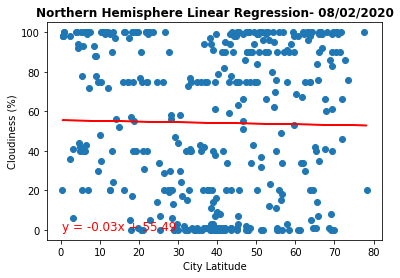

In [68]:
# Plot the latitude of the city compared to its cloudiness
city_lat = northern_data['Latitude']
clouds = northern_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, clouds)
#Saving the scatter plot as a png file
plt.savefig("northern_regress_clouds.png")
plt.show()

This linear regression model for the Northern hemisphere is showing if there is any correlation between cloudiness and latitude. Based on the r-squared value (correlation coeficient), there is almost no correlation between latitude and cloudiness. No matter the latitude, more cities have either < 20% or > 70% cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04661276534359974


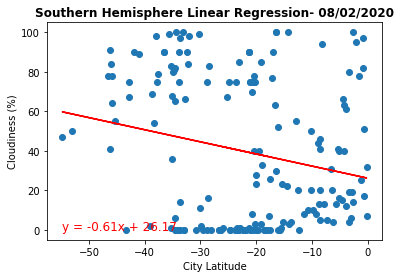

In [69]:
# Plot the latitude of the city compared to its cloudiness
city_lat = southern_data['Latitude']
clouds = southern_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, clouds)
#Saving the scatter plot as a png file
plt.savefig("southern_regress_clouds.png")
plt.show()

This linear regression model for the Southern hemisphere is showing if there is any correlation between cloudiness and latitude. Based on the r-squared value (correlation coeficient), there is a very weak correlation between latitude and cloudiness. No matter the latitude, it seems that more cities have < 30% cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006851446469872947


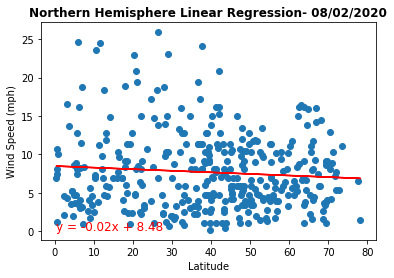

In [70]:
# Plot the latitude of the city compared to its wind speed
city_lat = northern_data['Latitude']
wind = northern_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, wind)
#Saving the scatter plot as a png file
plt.savefig("northern_regress_wind.png")
plt.show()

This linear regression model for the Northern hemisphere is showing if there is any correlation between wind speed and latitude. Based on the r-squared value (correlation coeficient), there is a very weak correlation between latitude and wind speed. On this particular day, there is a concentration of cites in the Northern hemisphere with wind speeds < 15mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00033854161899343706


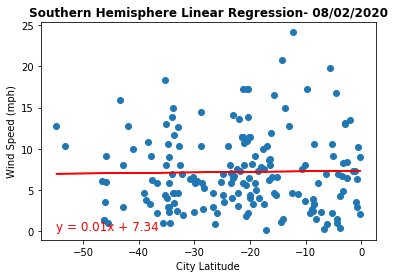

In [71]:
# Plot the latitude of the city compared to its wind speed
city_lat = southern_data['Latitude']
wind = southern_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, wind)
#Saving the scatter plot as a png file
plt.savefig("southern_regress_wind.png")
plt.show()

This linear regression model for the Southern hemisphere is showing if there is any correlation between wind speed and latitude. Based on the r-squared value (correlation coeficient), there is almost no correlation between latitude and wind speed. On this particular day, there is a concentration of cites in the Southern hemisphere with wind speeds < 5mph.